## Library

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

## Data Wrangling

### Data Collecting

In [2]:
df = pd.read_csv('data.csv')

### Data Assessing

In [3]:
df.shape

(77995, 23)

In [4]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917.0,0.0,0.0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520.0,0.0,0.0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242.0,0.0,0.0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492.0,0.0,0.0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665.0,0.0,0.0,0.0,0.0


In [5]:
df.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
77990,42305,3,10.0.0.16,10.0.0.5,159489,8612406,290,734000000,2.910000e+11,5,...,545,1,TCP,4,38351823,468906791.0,128.0,238.0,366.0,1.0
77991,42305,3,10.0.0.5,10.0.0.16,81112,4704496,289,540000000,2.900000e+11,5,...,272,1,TCP,2,3964523,3686840.0,130.0,121.0,251.0,1.0
77992,42305,3,10.0.0.5,10.0.0.16,81112,4704496,289,540000000,2.900000e+11,5,...,272,1,TCP,1,455253975,27088868.0,480.0,258.0,738.0,1.0
77993,42305,3,10.0.0.5,10.0.0.16,81112,4704496,289,540000000,2.900000e+11,5,...,272,1,TCP,3,174300507,172178536.0,0.0,121.0,121.0,1.0
77994,42305,3,10.0.0.5,10.0.0.16,81112,4704496,289,540000000,2.900000e+11,5,...,272,1,TCP,4,3835182,NaN,NaN,NaN,NaN,NaN


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77995 entries, 0 to 77994
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           77995 non-null  int64  
 1   switch       77995 non-null  int64  
 2   src          77995 non-null  object 
 3   dst          77995 non-null  object 
 4   pktcount     77995 non-null  int64  
 5   bytecount    77995 non-null  int64  
 6   dur          77995 non-null  int64  
 7   dur_nsec     77995 non-null  int64  
 8   tot_dur      77995 non-null  float64
 9   flows        77995 non-null  int64  
 10  packetins    77995 non-null  int64  
 11  pktperflow   77995 non-null  int64  
 12  byteperflow  77995 non-null  int64  
 13  pktrate      77995 non-null  int64  
 14  Pairflow     77995 non-null  int64  
 15  Protocol     77995 non-null  object 
 16  port_no      77995 non-null  int64  
 17  tx_bytes     77995 non-null  int64  
 18  rx_bytes     77994 non-null  float64
 19  tx_k

None

In [ ]:
[["pktcount", "bytecount", "pktperflow", "byteperflow", "pktrate", "tot_kbps", "tot_dur"]]

In [7]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
display(duplicate_rows)
print("Count duplicate row: ", len(duplicate_rows))


Duplicate Rows:


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
13,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413.0,0.0,0.0,0.0,0.0
15,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413.0,0.0,0.0,0.0,0.0
30,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3413,3665.0,0.0,0.0,0.0,0.0
34,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242.0,0.0,0.0,0.0,0.0
40,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33474,3249,8,10.0.0.12,10.0.0.5,88782,94641612,197,336000000,1.970000e+11,3,...,451,0,UDP,4,5060,458253204.0,0.0,10314.0,10314.0,0.0
33501,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,4,5783,689246731.0,0.0,1962.0,1962.0,1.0
33512,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,3,689246731,5783.0,1962.0,0.0,1962.0,1.0
33559,3159,8,10.0.0.12,10.0.0.5,48292,51479272,107,327000000,1.070000e+11,2,...,451,0,UDP,1,4266,1312.0,0.0,0.0,0.0,0.0


Count duplicate row:  5091


In [8]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,77995.000000,77995.000000,77995.000000,7.799500e+04,77995.000000,7.799500e+04,7.799500e+04,77995.000000,77995.000000,77995.000000,7.799500e+04,77995.000000,77995.000000,77995.000000,7.799500e+04,7.799400e+04,77994.000000,77488.000000,77488.000000,77994.000000
mean,18613.181409,4.023143,59232.963510,4.529636e+07,302.689595,4.568545e+08,3.030721e+11,5.254273,5429.434220,7137.761356,5.567951e+06,237.424732,0.569357,2.297981,8.950478e+07,8.953804e+07,1019.473306,1026.200534,2052.331045,0.432251
std,12194.670190,1.917120,50890.503398,5.037833e+07,282.835515,2.684565e+08,2.827219e+11,2.802427,5682.513496,7486.107533,7.927793e+06,249.555968,0.495169,1.050154,1.565325e+08,1.349757e+08,2531.084261,2123.566865,3225.557719,0.495392
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-129952.000000,-1.372656e+08,-4332.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,9756.000000,3.000000,6169.000000,1.013840e+06,115.000000,2.430000e+08,1.150000e+11,3.000000,1943.000000,30.000000,2.940000e+03,1.000000,0.000000,1.000000,4.181000e+03,3.362000e+03,0.000000,0.000000,0.000000,0.000000
50%,11755.000000,4.000000,53454.000000,1.793758e+07,233.000000,4.100000e+08,2.330000e+11,5.000000,2790.000000,8825.000000,9.718380e+05,294.000000,1.000000,2.000000,1.059780e+05,7.001552e+06,0.000000,0.000000,4.000000,0.000000
75%,30102.000000,5.000000,101383.000000,9.089783e+07,379.000000,6.860000e+08,3.800000e+11,7.000000,7916.000000,13308.000000,1.069613e+07,443.000000,1.000000,3.000000,1.355548e+08,1.439266e+08,245.000000,524.000000,3837.000000,1.000000
max,42305.000000,10.000000,260001.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,18890.000000,1.495125e+07,629.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [9]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [10]:
# Display unique values for object type columns
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())


Unique values for column 'src':
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']

Unique values for column 'dst':
['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17']

Unique values for column 'Protocol':
['UDP' 'TCP' 'ICMP']


### Data Cleaning

In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
duplicate_rows_after_removal = df[df.duplicated()]
display(duplicate_rows_after_removal)
print("Count duplicate row after removal: ", len(duplicate_rows_after_removal))

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label


Count duplicate row after removal:  0


In [12]:
# Remove rows with any null values
df = df.dropna()

# Display the DataFrame after removing null values
print("\nDataFrame null values:")
display(df.isnull().sum())



DataFrame null values:


,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [13]:
# Display unique values for object type columns and perform encoding
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())

    # Encoding using Label Encoding (replace with other methods if needed)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    print(f"\nEncoded values for column '{col}':")
    print(df[col].unique())



Unique values for column 'src':
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']

Encoded values for column 'src':
[ 0 10 13  1 12 14  4 15 11  2  3  9 17 16 18  5  6  7  8]

Unique values for column 'dst':
['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17']

Encoded values for column 'dst':
[15 14 10 12  1  4  0  2  9 11 16 13  5  6  3  7  8]

Unique values for column 'Protocol':
['UDP' 'TCP' 'ICMP']

Encoded values for column 'Protocol':
[2 1 0]


In [14]:
#Drop kolom dt
if 'dt' in df.columns:
    df = df.drop('dt', axis=1)
else:
    print("Column 'dt' not found in DataFrame.")


In [15]:
df.to_csv('clean_data.csv', index=False)

## EDA

In [16]:
df = pd.read_csv('clean_data.csv')

In [17]:
df.sample(10)

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
34619,1,3,9,86644,5718648,264,22000000,2.640000e+11,3,16567,...,334,1,1,1,6187815,146937938.0,0.0,0.0,0.0,0.0
36694,6,18,11,116096,6269184,398,121000000,3.980000e+11,4,3982,...,279,1,1,2,5416,1312.0,0.0,0.0,0.0,1.0
32432,9,13,5,63746,3697268,215,573000000,2.160000e+11,5,10817,...,295,1,1,3,5964293,6734411.0,258.0,277.0,535.0,1.0
56870,4,0,14,71374,74105500,290,68000000,2.900000e+11,9,1057,...,298,1,0,1,174621511,174604910.0,4941.0,4941.0,9882.0,1.0
60017,1,10,14,302,29596,309,926000000,3.100000e+11,5,2053,...,0,1,0,3,157325,271064031.0,1.0,1.0,2.0,0.0
3504,2,1,14,106175,110634350,353,403000000,3.530000e+11,2,1931,...,202,0,2,1,3826,1402.0,0.0,0.0,0.0,1.0
21809,4,16,12,134971,143879086,316,743000000,3.170000e+11,3,8803,...,191,0,2,1,4843,143927708.0,0.0,0.0,0.0,0.0
7999,4,4,15,75074,78227108,240,863000000,2.410000e+11,6,1943,...,306,0,2,3,4169,231189553.0,0.0,7676.0,7676.0,1.0
19402,3,12,12,87082,90739444,286,493000000,2.860000e+11,3,7916,...,274,0,2,3,566379701,5951.0,0.0,0.0,0.0,1.0
51885,6,12,12,43926,45770892,138,159000000,1.380000e+11,9,3024,...,321,1,0,1,28619,24972.0,0.0,0.0,0.0,1.0


In [18]:
df.describe()

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,72397.000000,72397.000000,72397.000000,72397.000000,7.239700e+04,72397.000000,7.239700e+04,7.239700e+04,72397.000000,72397.000000,...,72397.000000,72397.000000,72397.000000,72397.000000,7.239700e+04,7.239700e+04,72397.000000,72397.000000,72397.000000,72397.000000
mean,4.054160,8.835587,10.456773,58470.623382,4.316134e+07,311.470102,4.528652e+08,3.118465e+11,5.388069,5646.713054,...,230.612166,0.613368,1.065749,2.288741,9.509621e+07,9.466822e+07,1075.773817,1067.908518,2143.682335,0.423429
std,1.936733,6.008910,4.567090,51513.350731,5.027358e+07,289.714922,2.697276e+08,2.895984e+11,2.836771,5818.802246,...,254.854080,0.486982,0.838572,1.040071,1.595500e+08,1.361068e+08,2597.007558,2148.343165,3275.843271,0.494106
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,...,-4332.000000,0.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,9.000000,3400.000000,4.237920e+05,120.000000,2.350000e+08,1.200000e+11,3.000000,1943.000000,...,1.000000,0.000000,0.000000,1.000000,4.514000e+03,3.483000e+03,0.000000,0.000000,0.000000,0.000000
50%,4.000000,10.000000,12.000000,52419.000000,1.147106e+07,240.000000,4.050000e+08,2.400000e+11,5.000000,2800.000000,...,288.000000,1.000000,1.000000,2.000000,2.639866e+06,1.358074e+07,0.000000,0.000000,8.000000,0.000000
75%,5.000000,14.000000,14.000000,100476.000000,8.560551e+07,388.000000,6.810000e+08,3.890000e+11,7.000000,7916.000000,...,441.000000,1.000000,2.000000,3.000000,1.359307e+08,1.455761e+08,265.000000,727.000000,3838.000000,1.000000
max,10.000000,18.000000,16.000000,260001.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,...,629.000000,1.000000,2.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


### Label distribution

In [27]:
label_counts = df['label'].value_counts()
print("Data with label 0:", label_counts.get(0, 0))
print("Data with label 1:", label_counts.get(1, 0))

Data with label 0: 41742
Data with label 1: 30655


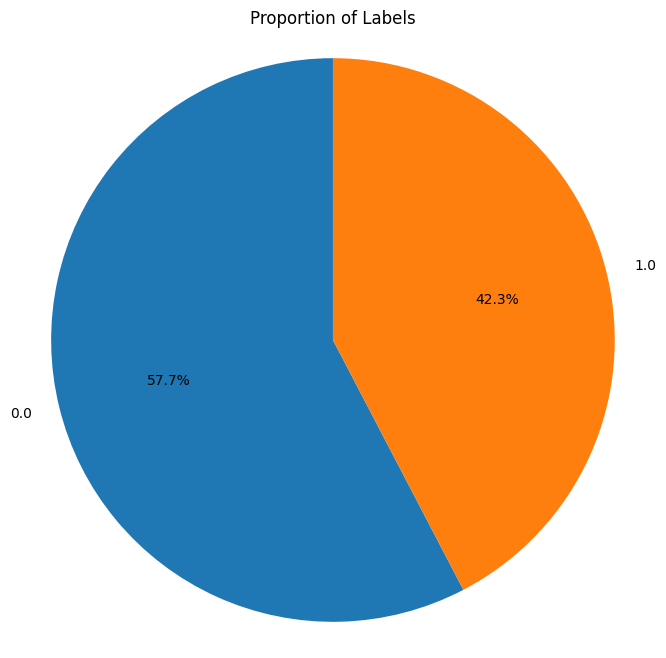

In [19]:
label_counts = df['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Labels')
plt.axis('equal')
plt.show()

### Correlation

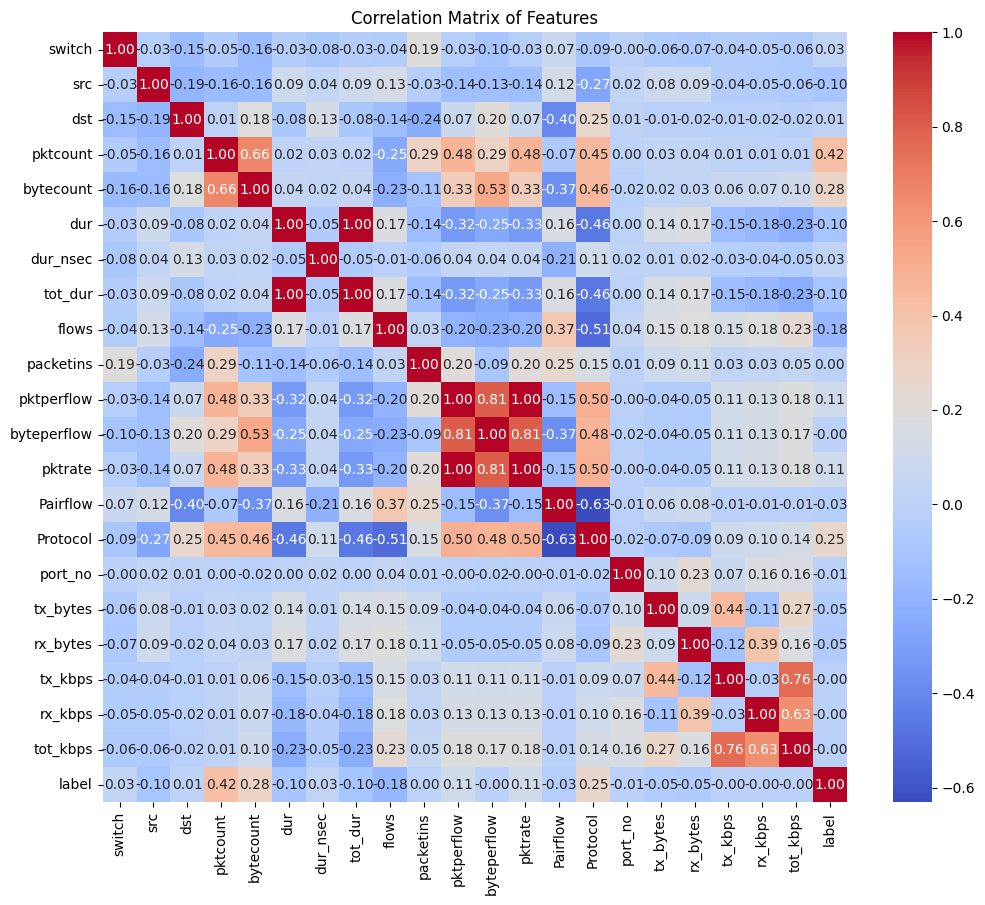

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Proportion of Protocol

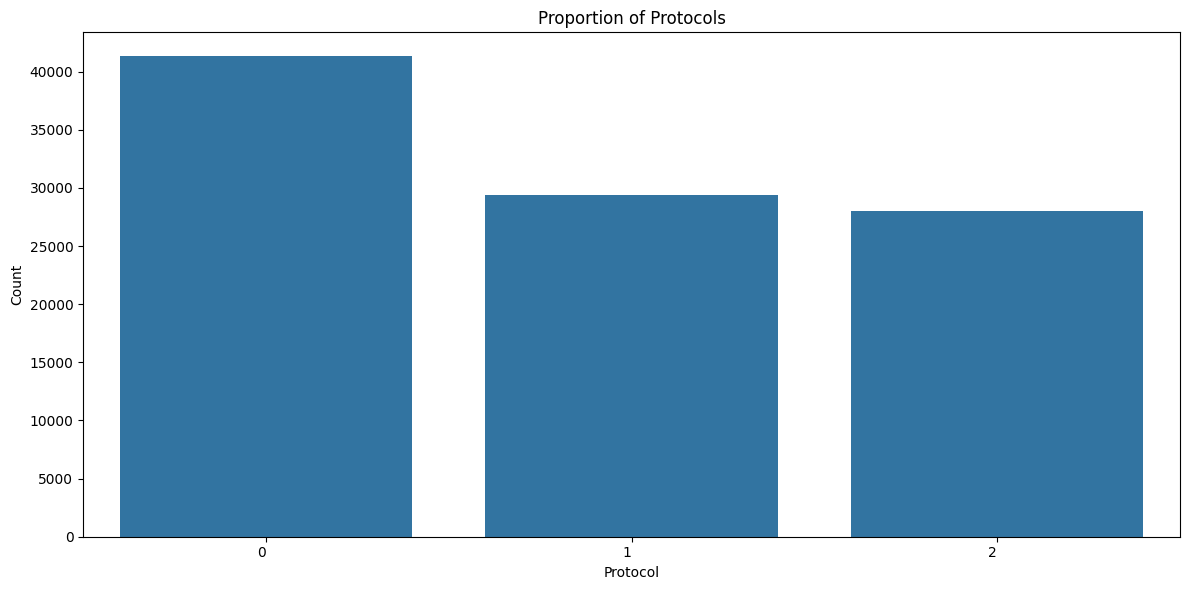

In [ ]:
protocol_counts = df['Protocol'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Proportion of Protocols')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

### Distribution between 2 labels

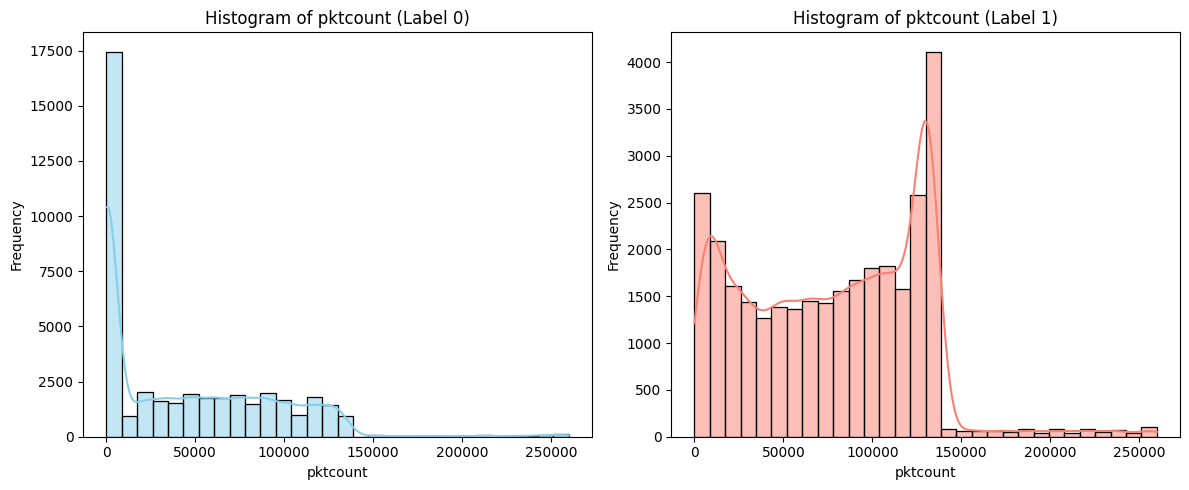

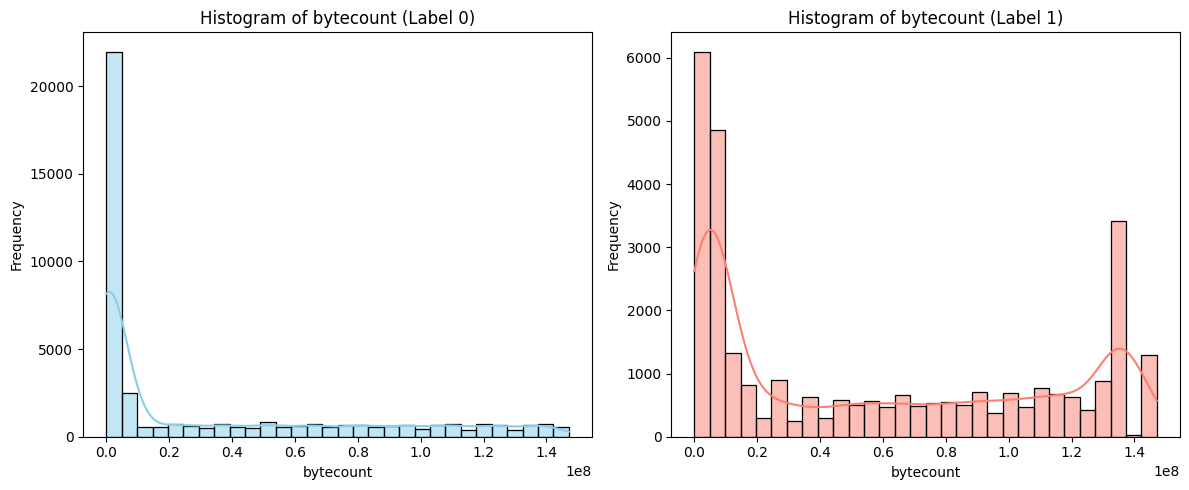

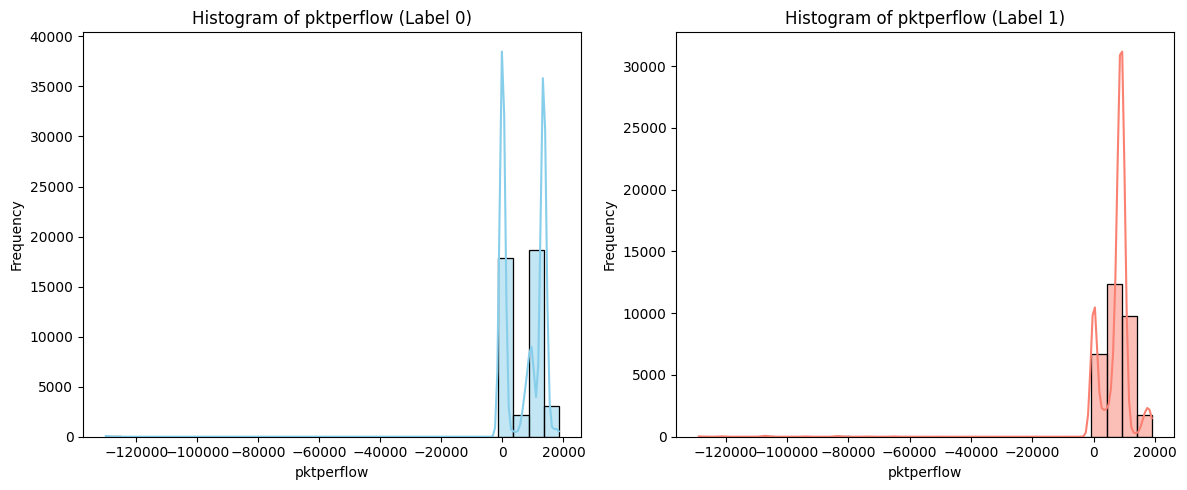

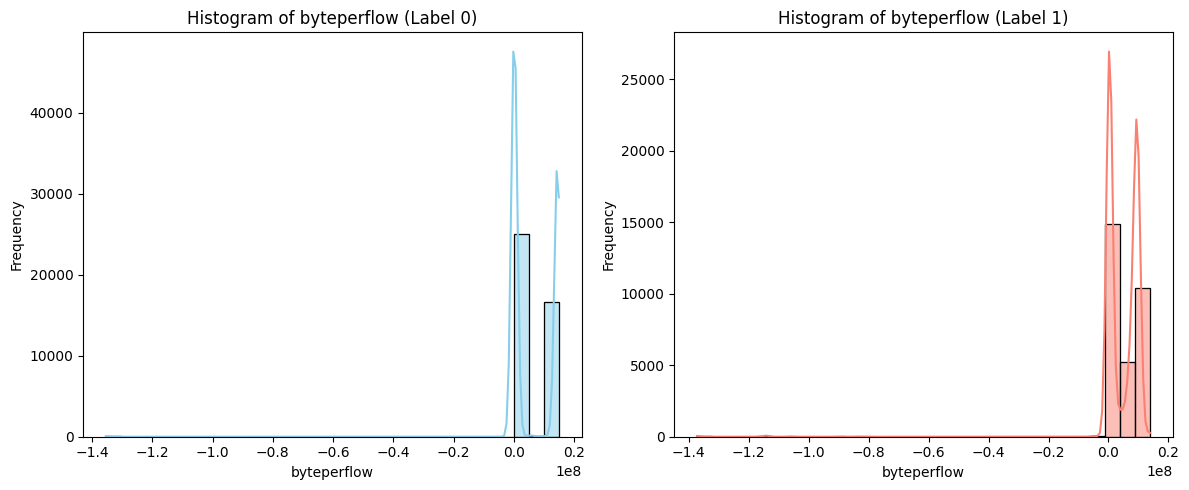

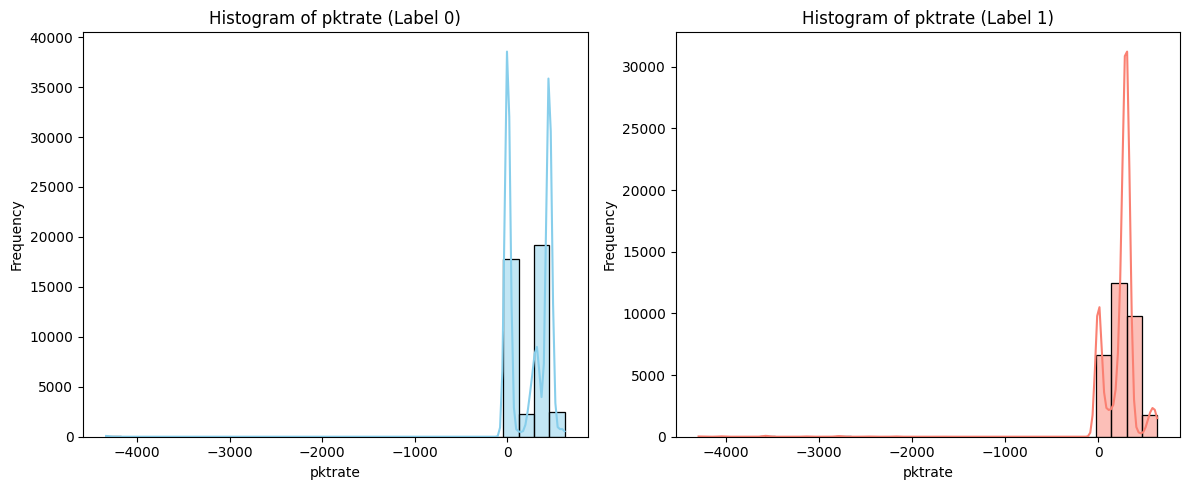

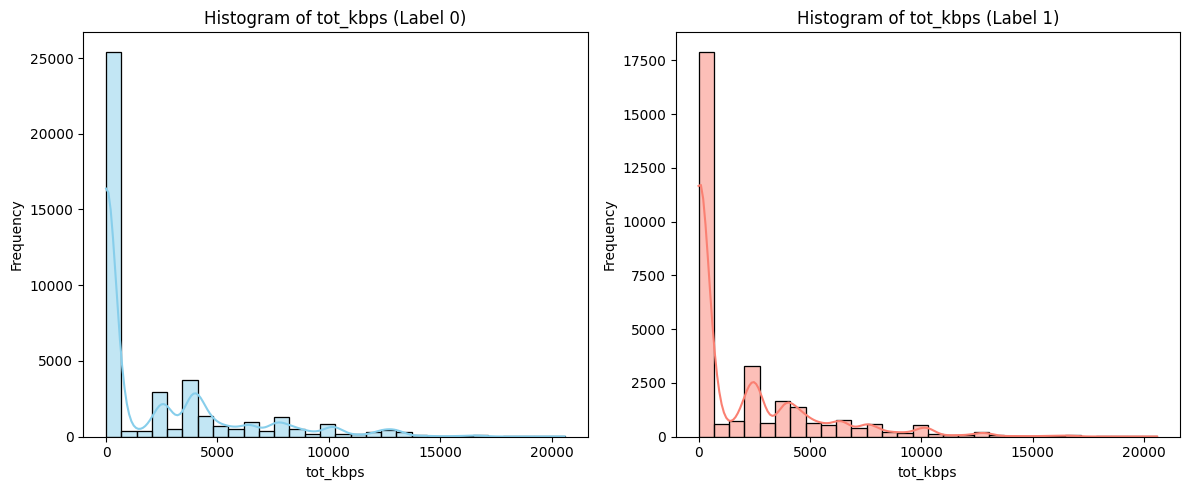

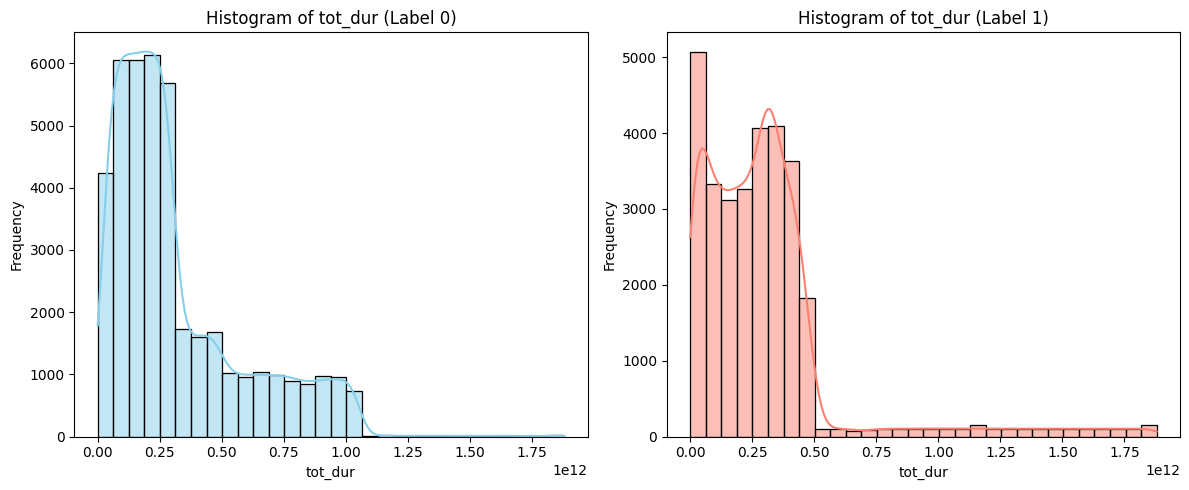

In [25]:
# Daftar kolom yang ingin divisualisasikan
cols = ["pktcount", "bytecount", "pktperflow", "byteperflow", "pktrate", "tot_kbps", "tot_dur"]

# Loop setiap kolom dan buat subplot
for col in cols:
    plt.figure(figsize=(12, 5))

    # Subplot untuk label 0
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['label'] == 0][col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col} (Label 0)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Subplot untuk label 1
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['label'] == 1][col], bins=30, kde=True, color='salmon')
    plt.title(f'Histogram of {col} (Label 1)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

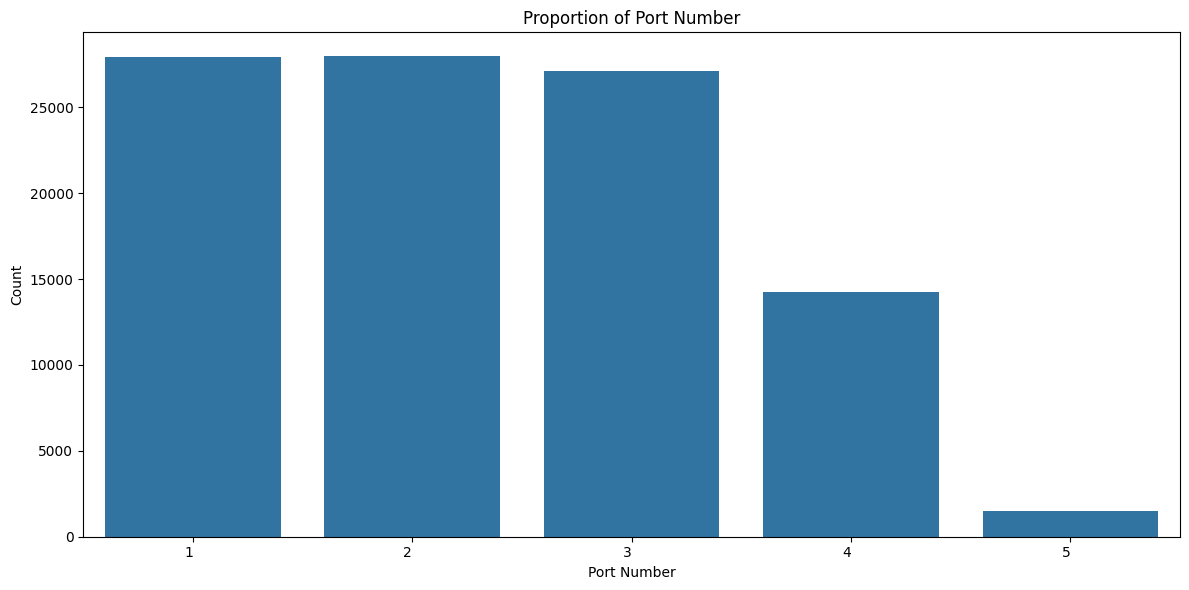

In [ ]:
protocol_counts = df['port_no'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.xlabel('Port Number')
plt.ylabel('Count')
plt.title('Proportion of Port Number')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## Data Processing

### Scaler

In [ ]:
# Select numerical features for scaling (exclude categorical features and the target variable)
numerical_features = df.select_dtypes(include=['number']).drop(columns=['label'], errors='ignore').columns

# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled DataFrame
print("Scaled DataFrame:")
display(df.head())

Scaled DataFrame:


,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,-1.648834,-1.528313,0.957023,-0.126567,0.249813,-0.794736,0.924029,-0.792925,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,0.624280,0.301323,-0.727727,-0.420919,-0.499021,-0.651783,0
1,-1.648834,-1.528313,0.957023,1.419807,2.038018,-0.170055,0.988676,-0.167989,-1.272284,-0.636419,...,0.98066,-1.319131,1.372663,1.550805,-0.634033,-0.727730,-0.420919,-0.499021,-0.651783,0
2,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,-1.228771,-0.634033,-0.727747,-0.420919,-0.499021,-0.651783,0
3,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,-0.302246,-0.634034,-0.727745,-0.420919,-0.499021,-0.651783,0
4,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,0.624280,-0.634036,-0.727729,-0.420919,-0.499021,-0.651783,0


### Mutual Information

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

        Feature  Mutual Information
4     bytecount            0.628482
3      pktcount            0.611059
11  byteperflow            0.551416
10   pktperflow            0.532835
12      pktrate            0.376283
7       tot_dur            0.259515
16     tx_bytes            0.208979
9     packetins            0.193970
5           dur            0.191953
17     rx_bytes            0.179109
20     tot_kbps            0.109207
19      rx_kbps            0.075825
1           src            0.075504
18      tx_kbps            0.070788
6      dur_nsec            0.058867
14     Protocol            0.041158
2           dst            0.036157
8         flows            0.026804
13     Pairflow            0.006304
15      port_no            0.004659
0        switch            0.003096


In [ ]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (78998, 21)
Validation data shape: (9875, 21)
Test data shape: (9875, 21)


In [ ]:
df.to_csv('processed_data.csv', index=False)

## Train Model

### All Dataset

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Random Forest

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("\n🎯 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🎯 Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6060    0]
 [   0 3815]]


#### XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Results:
Accuracy: 0.9997974683544304
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6058    2]
 [   0 3815]]


In [ ]:
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Random Forest Accuracy: 1.0000
XGBoost Accuracy: 0.9998


#### Tabnet

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
# Konversi DataFrame ke NumPy Array
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [ ]:
# Inisialisasi Model TabNet
tabnet_model = TabNetClassifier(verbose=1, seed=42)

# Training
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.21261 | val_0_accuracy: 0.92527 |  0:00:08s
epoch 1  | loss: 0.10026 | val_0_accuracy: 0.9197  |  0:00:16s
epoch 2  | loss: 0.07112 | val_0_accuracy: 0.96678 |  0:00:24s
epoch 3  | loss: 0.0639  | val_0_accuracy: 0.92678 |  0:00:31s
epoch 4  | loss: 0.05731 | val_0_accuracy: 0.96891 |  0:00:39s
epoch 5  | loss: 0.05744 | val_0_accuracy: 0.9517  |  0:00:46s
epoch 6  | loss: 0.05508 | val_0_accuracy: 0.95615 |  0:00:54s
epoch 7  | loss: 0.04851 | val_0_accuracy: 0.95332 |  0:01:01s
epoch 8  | loss: 0.0455  | val_0_accuracy: 0.90522 |  0:01:08s
epoch 9  | loss: 0.04087 | val_0_accuracy: 0.95443 |  0:01:16s
epoch 10 | loss: 0.04297 | val_0_accuracy: 0.94197 |  0:01:22s
epoch 11 | loss: 0.04127 | val_0_accuracy: 0.95301 |  0:01:30s
epoch 12 | loss: 0.03576 | val_0_accuracy: 0.90066 |  0:01:38s
epoch 13 | loss: 0.04117 | val_0_accuracy: 0.63392 |  0:01:45s
epoch 14 | loss: 0.03796 | val_0_accuracy: 0.9599  |  0:01:54s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Prediksi
y_pred_tabnet = tabnet_model.predict(X_test_np)

In [ ]:
# Evaluasi
print("TabNet Results:")
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print(classification_report(y_test_np, y_pred_tabnet))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_tabnet))

TabNet Results:
Accuracy: 0.9694177215189873
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6060
           1       0.93      1.00      0.96      3815

    accuracy                           0.97      9875
   macro avg       0.96      0.97      0.97      9875
weighted avg       0.97      0.97      0.97      9875

Confusion Matrix:
 [[5775  285]
 [  17 3798]]


### Top 6 Column (Big Correlation)

In [ ]:
X = df[['bytecount', 'pktcount', 'byteperflow', 'pktperflow', 'pktrate', 'tot_dur']]
y = df['label']

In [ ]:
X

,bytecount,pktcount,byteperflow,pktperflow,pktrate,tot_dur
0,0.249813,-0.126567,1.324460,0.979380,0.980660,-0.792925
1,2.038018,1.419807,1.323897,0.978847,0.980660,-0.167989
2,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
3,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
4,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
...,...,...,...,...,...,...
98743,-0.749062,-0.988990,-0.580203,-0.821292,-0.822989,-0.859439
98744,-0.749062,-0.988990,-0.580203,-0.821292,-0.822989,-0.859439
98745,-0.749160,-0.989906,-0.580190,-0.821159,-0.818990,-1.033161
98746,-0.749160,-0.989906,-0.580190,-0.821159,-0.818990,-1.033161


In [ ]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Random Forest

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model_2.predict(X_test)

# Evaluasi
print("\n🎯 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🎯 Random Forest Results:
Accuracy: 0.9998987341772152
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6059    1]
 [   0 3815]]


#### XGBoost

In [ ]:
xgb_model_2 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Prediksi
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluasi
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Results:
Accuracy: 0.9765063291139241
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6060
           1       0.96      0.98      0.97      3815

    accuracy                           0.98      9875
   macro avg       0.97      0.98      0.98      9875
weighted avg       0.98      0.98      0.98      9875

Confusion Matrix:
 [[5887  173]
 [  59 3756]]


In [ ]:
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Random Forest Accuracy: 0.9999
XGBoost Accuracy: 0.9765


#### Tabnet

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
# Konversi DataFrame ke NumPy Array
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [ ]:
# Inisialisasi Model TabNet
tabnet_model_2 = TabNetClassifier(verbose=1, seed=42)

# Training
tabnet_model_2.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.23353 | val_0_accuracy: 0.91342 |  0:00:06s
epoch 1  | loss: 0.17888 | val_0_accuracy: 0.90997 |  0:00:14s
epoch 2  | loss: 0.16313 | val_0_accuracy: 0.92273 |  0:00:21s
epoch 3  | loss: 0.16122 | val_0_accuracy: 0.92365 |  0:00:28s
epoch 4  | loss: 0.15528 | val_0_accuracy: 0.86704 |  0:00:35s
epoch 5  | loss: 0.1515  | val_0_accuracy: 0.89478 |  0:00:42s
epoch 6  | loss: 0.15163 | val_0_accuracy: 0.9038  |  0:00:49s
epoch 7  | loss: 0.17361 | val_0_accuracy: 0.92152 |  0:00:56s
epoch 8  | loss: 0.16263 | val_0_accuracy: 0.92314 |  0:01:03s
epoch 9  | loss: 0.16212 | val_0_accuracy: 0.89742 |  0:01:10s
epoch 10 | loss: 0.15246 | val_0_accuracy: 0.888   |  0:01:17s
epoch 11 | loss: 0.15204 | val_0_accuracy: 0.85661 |  0:01:24s
epoch 12 | loss: 0.14922 | val_0_accuracy: 0.91656 |  0:01:31s
epoch 13 | loss: 0.14542 | val_0_accuracy: 0.89205 |  0:01:39s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_accuracy = 0.92365


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Prediksi
y_pred_tabnet = tabnet_model_2.predict(X_test_np)

In [ ]:
# Evaluasi
print("TabNet Results:")
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print(classification_report(y_test_np, y_pred_tabnet))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_tabnet))

TabNet Results:
Accuracy: 0.9248607594936709
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6060
           1       0.87      0.95      0.91      3815

    accuracy                           0.92      9875
   macro avg       0.92      0.93      0.92      9875
weighted avg       0.93      0.92      0.93      9875

Confusion Matrix:
 [[5523  537]
 [ 205 3610]]


### Bot 6 Column (Low Correlation)

In [ ]:
X = df[['Protocol', 'dst', 'flows', 'Pairflow', 'port_no', 'switch']]
y = df['label']

In [ ]:
X

,Protocol,dst,flows,Pairflow,port_no,switch
0,1.372663,0.957023,-0.935255,-1.319131,0.624280,-1.648834
1,1.372663,0.957023,-1.272284,-1.319131,1.550805,-1.648834
2,1.372663,0.957023,-0.935255,-1.319131,-1.228771,-1.648834
3,1.372663,0.957023,-0.935255,-1.319131,-0.302246,-1.648834
4,1.372663,0.957023,-0.935255,-1.319131,0.624280,-1.648834
...,...,...,...,...,...,...
98743,-1.046147,0.765864,-0.261195,-1.319131,-1.228771,-0.633487
98744,-1.046147,0.765864,-0.261195,-1.319131,0.624280,-0.633487
98745,-1.046147,0.383547,-0.261195,-1.319131,-0.302246,-0.633487
98746,-1.046147,0.383547,-0.261195,-1.319131,-1.228771,-0.633487


In [ ]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Random Forest

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model_2.predict(X_test)

# Evaluasi
print("\n🎯 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🎯 Random Forest Results:
Accuracy: 0.7535189873417721
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6060
           1       0.71      0.61      0.66      3815

    accuracy                           0.75      9875
   macro avg       0.74      0.73      0.73      9875
weighted avg       0.75      0.75      0.75      9875

Confusion Matrix:
 [[5100  960]
 [1474 2341]]


#### XGBoost

In [ ]:
xgb_model_2 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Prediksi
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluasi
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Results:
Accuracy: 0.7493670886075949
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      6060
           1       0.71      0.60      0.65      3815

    accuracy                           0.75      9875
   macro avg       0.74      0.72      0.73      9875
weighted avg       0.75      0.75      0.74      9875

Confusion Matrix:
 [[5124  936]
 [1539 2276]]


In [ ]:
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Random Forest Accuracy: 0.7535
XGBoost Accuracy: 0.7494


#### Tabnet

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
# Konversi DataFrame ke NumPy Array
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [ ]:
# Inisialisasi Model TabNet
tabnet_model_2 = TabNetClassifier(verbose=1, seed=42)

# Training
tabnet_model_2.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=30,
    batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.59734 | val_0_accuracy: 0.65732 |  0:00:11s
epoch 1  | loss: 0.57947 | val_0_accuracy: 0.6718  |  0:00:19s
epoch 2  | loss: 0.57239 | val_0_accuracy: 0.68516 |  0:00:25s
epoch 3  | loss: 0.56606 | val_0_accuracy: 0.68446 |  0:00:33s
epoch 4  | loss: 0.56359 | val_0_accuracy: 0.69357 |  0:00:40s
epoch 5  | loss: 0.55789 | val_0_accuracy: 0.68476 |  0:00:47s
epoch 6  | loss: 0.55426 | val_0_accuracy: 0.69418 |  0:00:54s
epoch 7  | loss: 0.5463  | val_0_accuracy: 0.69711 |  0:01:00s
epoch 8  | loss: 0.54437 | val_0_accuracy: 0.67241 |  0:01:08s
epoch 9  | loss: 0.54283 | val_0_accuracy: 0.70734 |  0:01:14s
epoch 10 | loss: 0.53889 | val_0_accuracy: 0.70197 |  0:01:22s
epoch 11 | loss: 0.54041 | val_0_accuracy: 0.65944 |  0:01:29s
epoch 12 | loss: 0.54459 | val_0_accuracy: 0.67423 |  0:01:36s
epoch 13 | loss: 0.53994 | val_0_accuracy: 0.70957 |  0:01:44s
epoch 14 | loss: 0.53496 | val_0_accuracy: 0.71048 |  0:01:50s
epoch 15 | loss: 0.53093 | val_0_accuracy: 0.72284 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Prediksi
y_pred_tabnet = tabnet_model_2.predict(X_test_np)

In [ ]:
# Evaluasi
print("TabNet Results:")
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print(classification_report(y_test_np, y_pred_tabnet))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_tabnet))

TabNet Results:
Accuracy: 0.7236455696202532
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      6060
           1       0.67      0.56      0.61      3815

    accuracy                           0.72      9875
   macro avg       0.71      0.69      0.70      9875
weighted avg       0.72      0.72      0.72      9875

Confusion Matrix:
 [[5021 1039]
 [1690 2125]]


## Error Analysis

### Miss Classified

In [ ]:
# Baca data awal sebelum preprocessing
df_original = pd.read_csv('data.csv')

# Dapatkan indeks asli dari X_test sebelum splitting
original_indices_test = X_test.index

# Identifikasi indeks asli dari data yang salah diklasifikasi
original_misclassified_indices = original_indices_test[misclassified_indices]

# Ambil data asli (sebelum preprocessing) berdasarkan indeks yang salah diklasifikasi
misclassified_data_original = df_original.loc[original_misclassified_indices].copy()

# Tambahkan kolom 'True_Label' dan 'Predicted_Label' ke dataframe asli
misclassified_data_original['True_Label'] = y_test.values[misclassified_indices]
misclassified_data_original['Predicted_Label'] = y_pred_tabnet_test[misclassified_indices]


# Tampilkan data asli yang salah diklasifikasi
print("\nMisclassified data from TabNet (Top 6 Columns) using original data:")
display(misclassified_data_original)

# Simpan data asli yang salah diklasifikasi ke file CSV
misclassified_data_original.to_csv('misclassified_data_tabnet_top6_original.csv', index=False)
print("\nData asli yang salah klasifikasi telah disimpan ke 'misclassified_data_tabnet_top6_original.csv'")


Misclassified data from TabNet (Top 6 Columns) using original data:


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,True_Label,Predicted_Label
38896,24941,3,10.0.0.4,10.0.0.14,129567,7514886,464,56000000,4.640000e+11,5,...,TCP,1,5506,1472,0,0.0,0.0,1,0,1
39817,25271,5,10.0.0.9,10.0.0.12,55361,60847298,124,81000000,1.240000e+11,9,...,TCP,1,2691776,60916614,173,3924.0,4097.0,0,0,1
68296,30762,3,10.0.0.4,10.0.0.7,302,29596,309,815000000,3.100000e+11,9,...,ICMP,4,271474785,271461449,2,2.0,4.0,0,0,1
64119,29772,2,10.0.0.3,10.0.0.7,849,83202,870,234000000,8.700000e+11,7,...,ICMP,4,135630800,271077464,2,2.0,4.0,0,0,1
66784,30342,7,10.0.0.11,10.0.0.7,741,72618,760,34000000,7.600000e+11,3,...,ICMP,4,105721,135565182,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64129,29772,2,10.0.0.7,10.0.0.1,130751,135533598,770,117000000,7.700000e+11,7,...,ICMP,1,90326,135546754,0,0.0,0.0,1,1,0
67922,30642,1,10.0.0.7,10.0.0.2,887,86926,909,943000000,9.100000e+11,5,...,ICMP,2,135542233,91738,0,0.0,0.0,0,0,1
31532,2769,7,10.0.0.10,10.0.0.3,80089,83452738,287,512000000,2.880000e+11,4,...,UDP,1,3943,1492,0,0.0,0.0,1,1,0
35659,11349,3,10.0.0.2,10.0.0.5,54820,60929704,124,362000000,1.240000e+11,9,...,TCP,3,177690371,83751792,169,4055.0,4224.0,0,1,0



Data asli yang salah klasifikasi telah disimpan ke 'misclassified_data_tabnet_top6_original.csv'


In [ ]:
top_6_original = misclassified_data_original[['bytecount', 'pktcount', 'byteperflow', 'pktperflow', 'pktrate', 'tot_dur', "True_Label", "Predicted_Label"]]

In [ ]:
display(top_6_original)

,bytecount,pktcount,byteperflow,pktperflow,pktrate,tot_dur,True_Label,Predicted_Label
38896,7514886,129567,473744,8168,272,4.640000e+11,0,1
39817,60847298,55361,14931818,13589,452,1.240000e+11,0,1
68296,29596,302,2940,30,1,3.100000e+11,0,1
64119,83202,849,2842,29,0,8.700000e+11,0,1
66784,72618,741,2842,29,0,7.600000e+11,0,1
...,...,...,...,...,...,...,...,...
64129,135533598,130751,2842,29,0,7.700000e+11,1,0
67922,86926,887,2842,29,0,9.100000e+11,0,1
31532,83452738,80089,9047686,8683,289,2.880000e+11,1,0
35659,60929704,54820,14740610,13345,444,1.240000e+11,1,0


In [ ]:
top_6_original.to_csv("Top_6_Original_Data.csv", index=False)

### Correctly Classified

In [ ]:
# Identifikasi indeks data yang benar diklasifikasi
correctly_classified_indices = np.where(y_test.values == y_pred_tabnet_test)[0]

# Ambil data yang benar diklasifikasi dari X_test
correctly_classified_data = X_test.iloc[correctly_classified_indices]

# Tambahkan kolom 'True_Label' dan 'Predicted_Label'
correctly_classified_data['True_Label'] = y_test.values[correctly_classified_indices]
correctly_classified_data['Predicted_Label'] = y_pred_tabnet_test[correctly_classified_indices]

# Dapatkan indeks asli dari X_test sebelum splitting
original_indices_test = X_test.index

# Identifikasi indeks asli dari data yang benar diklasifikasi
original_correctly_classified_indices = original_indices_test[correctly_classified_indices]

# Ambil data asli (sebelum preprocessing) berdasarkan indeks yang benar diklasifikasi
correctly_classified_data_original = df_original.loc[original_correctly_classified_indices].copy()

# Tambahkan kolom 'True_Label' dan 'Predicted_Label' ke dataframe asli
correctly_classified_data_original['True_Label'] = y_test.values[correctly_classified_indices]
correctly_classified_data_original['Predicted_Label'] = y_pred_tabnet_test[correctly_classified_indices]

# Tampilkan data asli yang benar diklasifikasi
print("\nCorrectly classified data from TabNet (Top 6 Columns) using original data:")
display(correctly_classified_data_original)

# Kumpulkan dan tampilkan hanya kolom 6 fitur dan label dari data asli yang benar diklasifikasi
top_6_original_correct = correctly_classified_data_original[['bytecount', 'pktcount', 'byteperflow', 'pktperflow', 'pktrate', 'tot_dur', "True_Label", "Predicted_Label"]]
print("\nCorrectly classified data (Top 6 Columns) from original data:")
display(top_6_original_correct)

# Simpan data yang benar diklasifikasi ke file CSV
top_6_original_correct.to_csv("Top_6_Original_Correct_Data.csv", index=False)
print("\nData asli yang benar klasifikasi (Top 6 Kolom) telah disimpan ke 'Top_6_Original_Correct_Data.csv'")


Correctly classified data from TabNet (Top 6 Columns) using original data:


/tmp/ipython-input-61-4245354039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctly_classified_data['True_Label'] = y_test.values[correctly_classified_indices]
/tmp/ipython-input-61-4245354039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctly_classified_data['Predicted_Label'] = y_pred_tabnet_test[correctly_classified_indices]


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,True_Label,Predicted_Label
21950,2578,2,10.0.0.11,10.0.0.3,38994,41567604,83,13000000,8.301300e+10,4,...,UDP,2,3236,3404,0,0.0,0.0,0,0,0
88875,30711,4,10.0.0.10,10.0.0.5,550,53900,563,149000000,5.630000e+11,7,...,ICMP,3,359491143,133942117,4486,1.0,4487.0,0,0,0
12255,9936,4,10.0.0.3,10.0.0.7,91206,97225596,201,313000000,2.010000e+11,6,...,UDP,1,3546,1402,0,0.0,0.0,0,0,0
65230,29952,4,10.0.0.7,10.0.0.6,312,30576,319,954000000,3.200000e+11,15,...,ICMP,3,138126657,219751629,5065,2539.0,7604.0,0,1,1
66183,30162,5,10.0.0.7,10.0.0.11,566,55468,579,987000000,5.800000e+11,4,...,ICMP,2,271084353,255088779,0,2362.0,2362.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45234,31753,4,10.0.0.14,10.0.0.1,185043,9992322,319,590000000,3.200000e+11,5,...,TCP,3,622064741,50583155,450,241.0,691.0,0,0,0
30687,2859,6,10.0.0.10,10.0.0.3,106455,110926110,377,441000000,3.770000e+11,2,...,UDP,3,253465995,4379,2188,0.0,2188.0,1,1,1
17708,9996,5,10.0.0.12,10.0.0.7,134952,143858832,312,891000000,3.130000e+11,3,...,UDP,3,3413,3539,0,0.0,0.0,1,0,0
52978,28458,3,10.0.0.2,10.0.0.7,918,89964,941,164000000,9.410000e+11,11,...,ICMP,4,271439603,271437981,3,3.0,6.0,0,0,0



Correctly classified data (Top 6 Columns) from original data:


,bytecount,pktcount,byteperflow,pktperflow,pktrate,tot_dur,True_Label,Predicted_Label
21950,41567604,38994,14422980,13530,451,8.301300e+10,0,0
88875,53900,550,2842,29,0,5.630000e+11,0,0
12255,97225596,91206,14418716,13526,450,2.010000e+11,0,0
65230,30576,312,2842,29,0,3.200000e+11,1,1
66183,55468,566,2940,30,1,5.800000e+11,0,0
...,...,...,...,...,...,...,...,...
45234,9992322,185043,845424,15656,521,3.200000e+11,0,0
30687,110926110,106455,8232842,7901,263,3.770000e+11,1,1
17708,143858832,134952,7956624,7464,248,3.130000e+11,0,0
52978,89964,918,2842,29,0,9.410000e+11,0,0



Data asli yang benar klasifikasi (Top 6 Kolom) telah disimpan ke 'Top_6_Original_Correct_Data.csv'
